ValueError: Invalid RGBA argument: 0.8

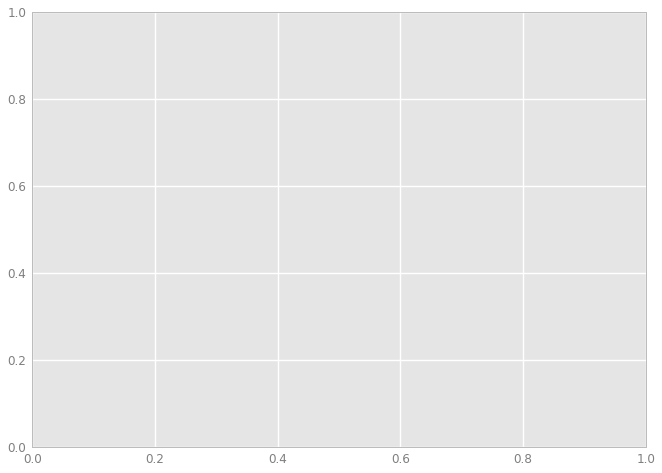

In [94]:
from __future__ import print_function
from __future__ import division
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType
from ggplot import *
import pandas as pd
from matplotlib import pyplot

schema = StructType([
    StructField("user_id", StringType()),
    StructField("business_id", StringType()),
    StructField("date", StringType()),
    StructField("stars", IntegerType()),
    StructField("review_length", IntegerType()),
    StructField("pos_words", IntegerType()),
    StructField("neg_words", IntegerType()),
    StructField("net_sentiment", IntegerType())
])

spark = SparkSession.builder.master("spark://Yashs-MacBook-Pro-2.local:7077").appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.csv("file:///Users/yashparikh/Project/yelp_reviews_small.csv", header=True, schema=schema)
df.createOrReplaceTempView("reviews")

posPropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion, stars  FROM reviews")
# star1PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 1")

posPropVal = posPropDF.select("proportion").rdd.flatMap(lambda x: x).collect()
# star1PropVal = star1PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()
starsVal = posPropDF.select('stars').rdd.flatMap(lambda x: x).collect()

plotDF = pd.DataFrame()
plotDF["proportion"] = posPropVal
plotDF["stars"] = starsVal
# color = ["#FF4040", "#CD3333","#CD5B45", "#6E8B3D", "#228B22"]
print(ggplot(plotDF, aes(x = 'proportion', fill = "stars", color = "stars")) + geom_histogram())

In [87]:
star2PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 2")
star2PropVal = star2PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()

In [88]:
star3PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 3")
star3PropVal = star3PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()

In [89]:
star4PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 4")
star4PropVal = star4PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()

In [90]:
star5PropDF = spark.sql("SELECT round((pos_words + 1) * 100/(review_length + 1), 2) as proportion FROM reviews WHERE stars = 5")
star5PropVal = star5PropDF.select("proportion").rdd.flatMap(lambda x: x).collect()

In [93]:
# pyplot.hist(x = star1PropVal, normed=True, label='1-star')
# pyplot.hist(x = star2PropVal, normed=True, label='2-star')
# pyplot.hist(x = star3PropVal, normed=True, label='3-star')
# pyplot.hist(x = star4PropVal, normed=True, label='4-star')
# pyplot.hist(x = star5PropVal, normed=True, label='5-star')
# pyplot.legend(loc='upper right')
pd.DataFrame({"star1": star1PropVal,
              "star2": star2PropVal,
              "star3": star3PropVal,
              "star4": star4PropVal,
              "star5": star5PropVal
            }).plot.hist(stacked=True)
 
# p = ggplot(aes(x='date', y='value'), data=meat_lng)
# pyplot.show()

ValueError: arrays must all be same length